# r/language_exchange: Most popular languages and demographics

In [1]:
import pandas as pd
import math
import datetime as dt

## 1. Smaller sample and sex-gender analysis

In [5]:
data2 = pd.read_excel("data2.xlsx")

In [6]:
data2.sex.value_counts()

M    2624
F    1589
Name: sex, dtype: int64

### 1.1. Grouping by age group

In [13]:
data2['age_group'] = data2.apply(lambda row: math.floor(row.age / 5) - 1, axis=1)
def label_age_group(row):
    if (row['age_group'] == 1):
        return '10-14'
    elif (row['age_group'] == 2):
        return '15-19'
    elif (row['age_group'] == 3):
        return '20-24'
    elif (row['age_group'] == 4):
        return '25-29'
    elif (row['age_group'] == 5):
        return '30-34'
    elif (row['age_group'] == 6):
        return '35-39'
    elif (row['age_group'] == 7):
        return '40-44'
    elif (row['age_group'] == 8):
        return '45-49'
    else:
        return '50+'
data2['age_group_t'] = data2.apply(lambda row: label_age_group(row), axis=1)
data2[['age', 'age_group', 'age_group_t']]

,age,age_group,age_group_t
0,20,3,20-24
1,14,1,10-14
2,30,5,30-34
3,21,3,20-24
4,19,2,15-19
...,...,...,...
4208,18,2,15-19
4209,17,2,15-19
4210,93,17,50+
4211,28,4,25-29


In [42]:
age_sex_chart = pd.crosstab(index=data2["age_group_t"], columns=data2["sex"], margins=True)
age_sex_chart.columns = ['F', 'M', 'age_total']
age_sex_chart.index = ['10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50+', 'sex_total']
age_sex_chart

,F,M,age_total
10-14,17,24,41
15-19,389,578,967
20-24,682,1011,1693
25-29,363,666,1029
30-34,98,236,334
35-39,22,60,82
40-44,7,19,26
45-49,9,15,24
50+,2,15,17
sex_total,1589,2624,4213


### 1.2. Percentual composition of sample

In [46]:
age_sex_chart/age_sex_chart.loc["sex_total"]

,F,M,age_total
10-14,0.010699,0.009146,0.009732
15-19,0.244808,0.220274,0.229528
20-24,0.429201,0.385290,0.401851
25-29,0.228446,0.253811,0.244244
30-34,0.061674,0.089939,0.079278
35-39,0.013845,0.022866,0.019464
40-44,0.004405,0.007241,0.006171
45-49,0.005664,0.005716,0.005697
50+,0.001259,0.005716,0.004035
sex_total,1.000000,1.000000,1.000000


### 1.3. Number of comments received by gender and age

In [57]:
data2.groupby(["sex", "age_group_t"])["num_comments"].mean()

sex  age_group_t
F    10-14          4.176471
     15-19          3.804627
     20-24          4.621701
     25-29          4.539945
     30-34          6.020408
     35-39          3.272727
     40-44          2.857143
     45-49          3.000000
     50+            1.000000
M    10-14          3.833333
     15-19          3.022491
     20-24          2.944609
     25-29          3.322823
     30-34          2.822034
     35-39          3.483333
     40-44          3.526316
     45-49          5.200000
     50+            2.400000
Name: num_comments, dtype: float64

In [72]:
df1 = data2[["sex", "age_group_t", "num_comments"]] # could replace num_comments for 'score'

<AxesSubplot:xlabel='age_group_t'>

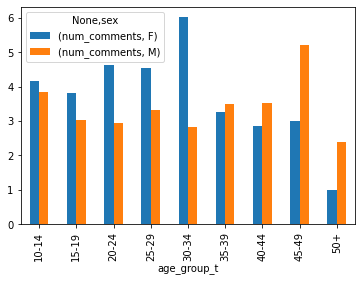

In [73]:
pd.pivot_table(df1,index = 'age_group_t',
               columns = 'sex',aggfunc ='mean').plot.bar()

### 1.4. Number of comments received by gender and time of the day

<AxesSubplot:xlabel='hour'>

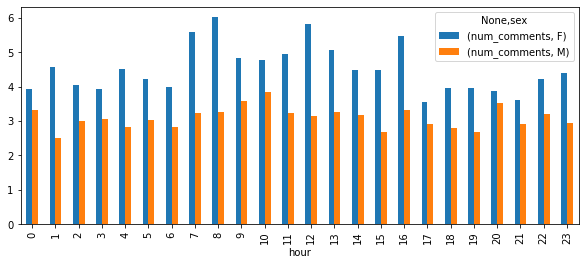

In [114]:
df2 = data2[["created", "sex", "num_comments"]].copy() #score
df2['real_date'] = pd.TimedeltaIndex(df2['created'], unit='d') + dt.datetime(1899, 12, 30)
df2['hour'] = df2['real_date'].dt.hour
df2.drop(columns=['created'], inplace=True)
pd.pivot_table(df2,index = 'hour', columns = 'sex',aggfunc ='mean').plot.bar(figsize=(10,4))

## 2. Larger sample and language popularity analysis

In [2]:
data1 = pd.read_excel("data1.xlsx")

### 2.1. Number of comments received, by time of the day, by people seeking a particular language (English in this case)

<AxesSubplot:xlabel='hour'>

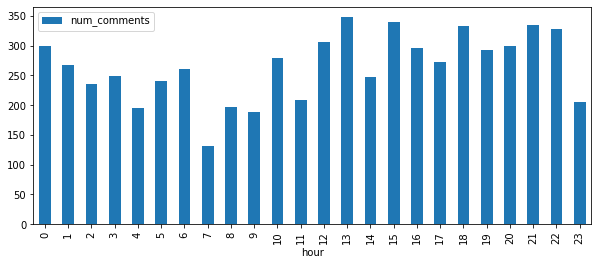

In [9]:
df3 = data1[["created", "seek_JA", "num_comments"]].copy()
df3.drop(df3[df3.seek_JA == 0].index, inplace=True)

df3['real_date'] = pd.TimedeltaIndex(df3['created'], unit='d') + dt.datetime(1899, 12, 30)
df3['hour'] = df3['real_date'].dt.hour
df3.drop(columns=['created', 'seek_JA', 'real_date'], inplace=True)
pd.pivot_table(df3, index='hour', aggfunc='sum').plot.bar(figsize=(10,4))

### 2.2. Finding the most popular language offering-seeking combinations

##### First, we start with the full matching (39745 obs * 41 possible 'Offering' languages * 41 possible 'Seeking' languages = 66811345 obs)

In [10]:
df4 = data1.copy()
df4.drop(columns=['offer', 'offer_lang', 'seek', 'seek_lang'], inplace=True)
df4 = df4.reset_index()
df4 = (pd.wide_to_long(df4, ['offer'], i='index', j='offer_L', sep='_', suffix='\w+'))

df4 = df4.reset_index()
df4.drop(columns='index', inplace=True)
df4 = df4.reset_index()

df4 = (pd.wide_to_long(df4, ['seek'], i='index', j='seek_L', sep='_', suffix='\w+'))
df4

,,offer_L,offer,created,upvote_ratio,score,title,num_comments,seek
index,seek_L,,,,,,,,
0,ZH,EN,1,44803.169734,0.75,2,Offering: Native English ( USA ) Looking for: ...,3,0
1,ZH,EN,1,44803.116053,0.86,5,Offering: English (Native) Seeking: Russian,5,0
2,ZH,EN,0,44803.060174,0.99,1,Offering: European Spanish (native) | Seeking:...,1,0
3,ZH,EN,1,44803.011470,1.00,6,"Offering: Native English, French Seeking Frien...",1,0
4,ZH,EN,1,44802.936632,1.00,6,"Hi, I’m offering english(native) and I’m seeki...",4,0
...,...,...,...,...,...,...,...,...,...
1629540,FR,TL4,0,42465.876169,1.00,6,Offering: Dutch. Looking for Deutsch,0,0
1629541,FR,TL4,0,42465.840937,1.00,4,"Offering English (American, native speaker), s...",0,0
1629542,FR,TL4,0,42465.739572,1.00,7,"Offering: Russian (native), Swedish (native), ...",1,1


#### Then we keep only the ones that had at least one match

In [11]:
df4 = df4.reset_index()
df4 = df4.loc[(df4['seek'] == 1) & (df4['offer'] == 1)]
df4

,index,seek_L,offer_L,offer,created,upvote_ratio,score,title,num_comments,seek
59,59,ZH,EN,1,44801.633090,0.60,1,"Offering: English, Portuguese | Seeking: Manda...",4,1
111,111,ZH,EN,1,44799.856991,1.00,1,"Offering: English (Native, British) Seeking: S...",5,1
122,122,ZH,EN,1,44799.540012,1.00,2,Offering: English/Bengali | Seeking: Chinese/F...,2,1
190,190,ZH,EN,1,44797.280984,1.00,2,"Offering: English | seeking: Thai, Chinese (Ma...",3,1
446,446,ZH,EN,1,44790.809444,1.00,1,Offering: English (Native) | Seeking: Mandarin...,4,1
...,...,...,...,...,...,...,...,...,...,...
66808470,1626670,FR,TL4,1,43033.157639,0.67,1,"Offer: English, Filipino (Tagalog) || Seeking:...",0,1
66809158,1627358,FR,TL4,1,42879.671481,0.67,1,"Offering: Tagalog or English, Seeking: French",0,1
66809375,1627575,FR,TL4,1,42834.137824,0.88,6,Seeking: French; Offering: Tagalog or English,0,1
66811155,1629355,FR,TL4,1,42508.889931,1.00,4,"[Offering English, Tagalog] seeking French",0,1


### 2.3. 41x41 table of occurrences

In [12]:
CT = pd.crosstab(df4['offer_L'], df4['seek_L'])
CT.loc['Seek_Total']= CT.sum(numeric_only=True, axis=0)
CT.loc[:,'Offer_Total'] = CT.sum(numeric_only=True, axis=1)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(CT)

seek_L        AR  BE  BN  BS   CS   DA    DE   EL     EN    ES  ET   FI    FR  \
offer_L                                                                         
AR            22   0   0   1    1    5   397    4    843   276   3    7   232   
BE             0   0   0   0    0    0     4    0      8     0   0    1     0   
BN             3   0   0   0    0    0    24    0     44     8   0    0    12   
BS             3   0   0   0    1    2    14    1      7     5   0    1     5   
CS            11   0   0   0    3    1    41    1     46    24   0    2    21   
DA             3   0   0   2    0    6    29    4      2    15   0    2    21   
DE            49   0   0   0    7   26   195   16    439   329   1   30   369   
EL             3   0   0   0    2    2    43    6     31    40   0    2    39   
EN           754   6  17  24   98  143  3924  177   1313  4814  32  171  4511   
ES           110   0   3   5    8   31  1020   34   3055   194   2   43  1128   
ET             1   0   0   0

### 2.4. Color gradient of the most popular combinations (excluding English)

In [14]:
# Let's make a smaller crosstable, only with the most relevant languages
import seaborn as sns

b = CT.copy()

# We keep only the rows and columns with more than 1000 occurrences
b = b[b['Offer_Total'] > 1000]
filter = (b > 1000).any()
b = b.loc[: , filter]

# Then we drop the totals
b.drop(labels=['Seek_Total'], inplace=True)
b.drop(columns=['Offer_Total'], inplace=True)

# And we draw a color gradient
cm = sns.light_palette("green", as_cmap=True)
b.style.background_gradient(cmap=cm)

seek_L,AR,DE,EN,ES,FR,IT,JA,KO,PT,RU,SV,ZH,ZH6
offer_L,,,,,,,,,,,,,
AR,22,397,843,276,232,58,81,53,23,87,15,33,29
DE,49,195,439,329,369,119,168,107,42,170,93,40,57
EN,754,3924,1313,4814,4511,1429,2223,1534,718,1734,499,714,1096
ES,110,1020,3055,194,1128,458,425,234,302,321,108,138,194
FR,74,408,603,325,198,198,183,131,99,216,65,56,80
IT,20,183,428,112,139,29,89,35,36,81,35,30,26
PT,20,315,929,217,397,142,132,64,20,139,26,40,48
RU,50,414,1836,217,262,79,146,77,27,46,68,48,49
TR,54,229,759,134,133,53,72,33,17,98,19,23,21


### 2.5. Supply-demand gap analysis

In [11]:
# Let's find the supply-demand gap

# We create a copy of the crosstable
a = CT.loc[['Seek_Total']].T
# We set totals of supply and demand side by side
a = a['Seek_Total'].to_list()
gap = CT.copy()['Offer_Total'].reset_index()
gap['Seek_Total'] = a
gap.rename(columns = {'offer_L':'lang'}, inplace = True)
gap.set_index('lang', inplace=True)
# We calculate the difference
gap['Offer-Seek'] = gap['Offer_Total'] - gap['Seek_Total']
gap.drop(labels='Seek_Total', inplace=True)
# And get a graph
#gap['Offer-Seek'].plot.bar(figsize=(15,5))
gap

,Offer_Total,Seek_Total,Offer-Seek
lang,,,
AR,2311,1379,932
BE,18,9,9
BN,114,26,88
BS,62,40,22
CS,237,227,10
DA,141,314,-173
DE,2538,8572,-6034
EL,299,351,-52
EN,28378,14198,14180


<AxesSubplot:xlabel='lang'>

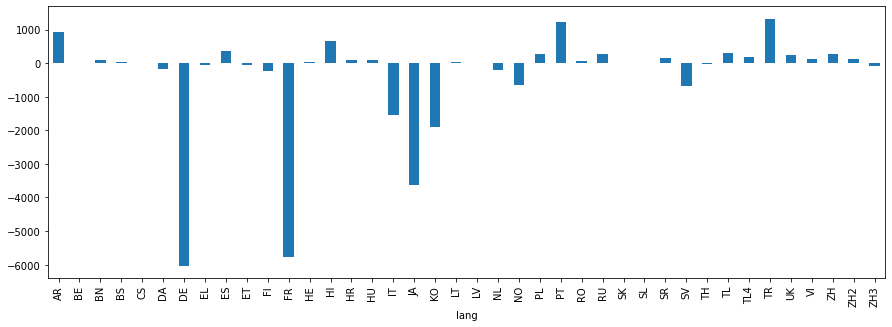

In [80]:
#Let's exclude English from the gap analysis, since it distorts them a little
gap.drop(labels='EN', inplace=True)
# And get a graph
gap['Offer-Seek'].plot.bar(figsize=(15,5))